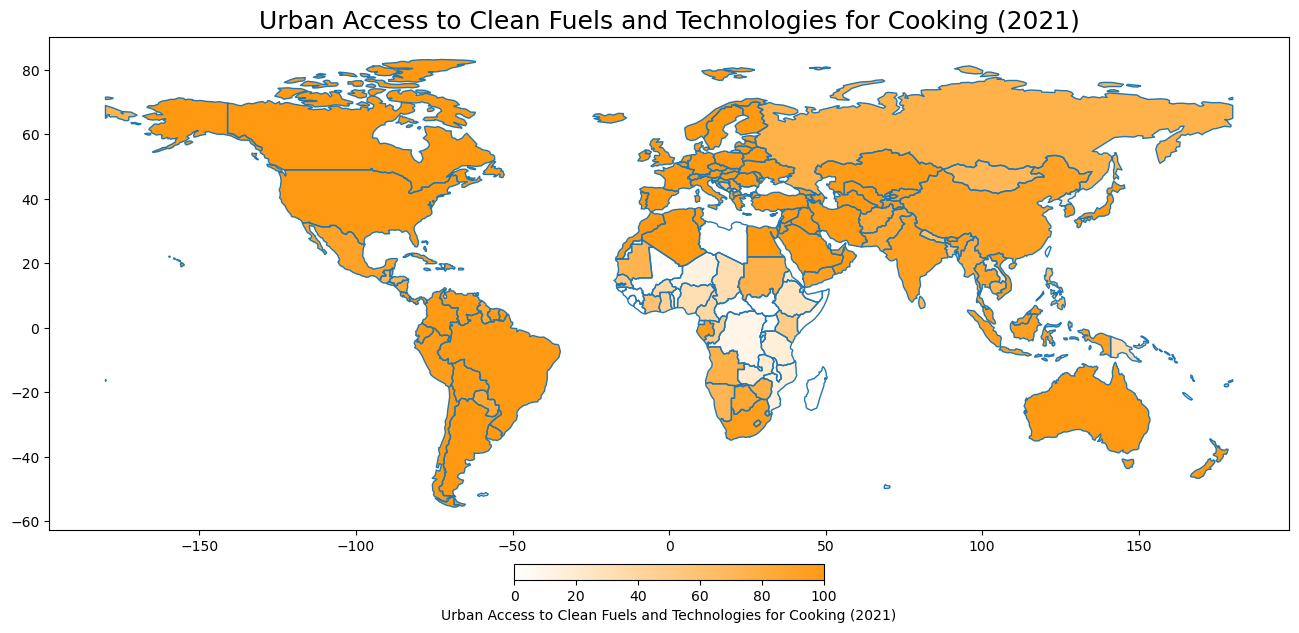

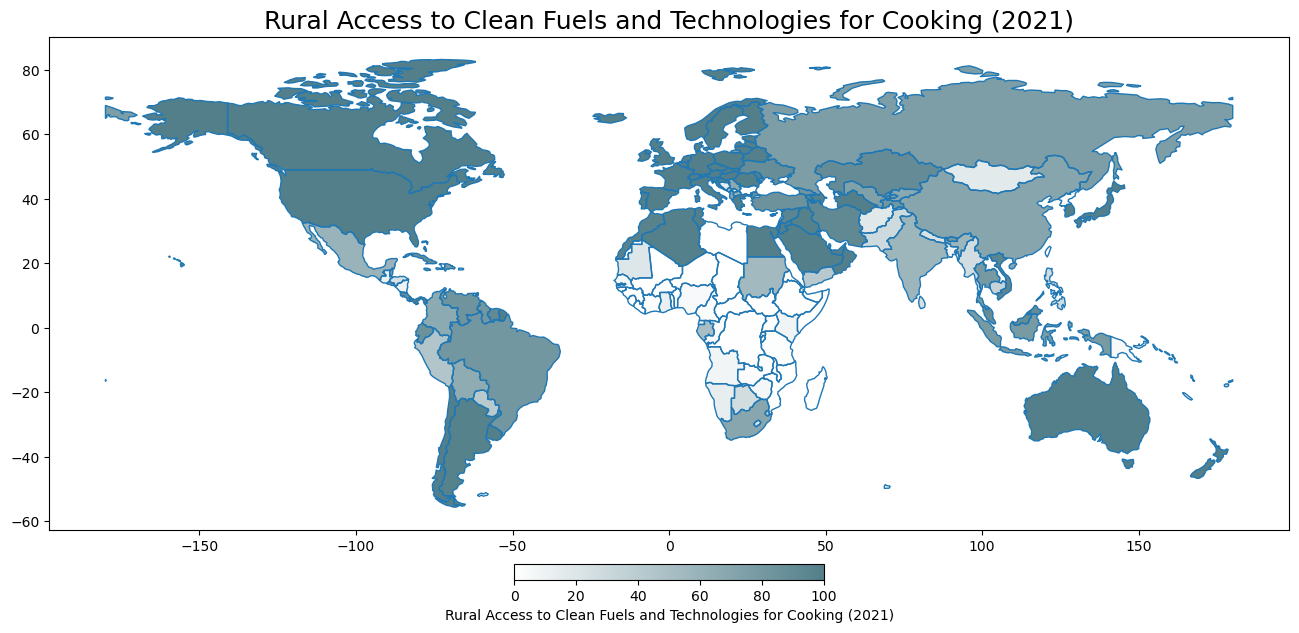

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

#Remove warning
import warnings
warnings.filterwarnings('ignore')

# Chart 5.8 Load and preprocess data (Urban)
data = pd.read_csv('CSV_7.1.2_Urban.csv')
data_cleaned = data.iloc[4:].reset_index(drop=True)
data_cleaned.columns = data.iloc[3]
data_cleaned = data_cleaned.rename(columns={'Country Name': 'Country', 'Country Code': 'Code', 'Indicator Name': 'Indicator', 'Indicator Code': 'Indicator_Code'})
data_cleaned = data_cleaned.drop(0)
data_2021 = data_cleaned[["Country", "Code", 2021.0]]
data_2021[2021.0] = data_2021[2021.0].astype(float)

# Load geospatial data and merge
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Remove Greenland and Antarctica
world = world[(world.name != "Greenland") & (world.name != "Antarctica")]
world_merged = world.merge(data_2021, left_on='iso_a3', right_on='Code')

# Create a custom color map with a single HEX color
cmap_custom = mcolors.LinearSegmentedColormap.from_list("custom", ["#ffffff", "#FF9912"], N=256)
#537f8a
#e28743
#EEB422
#CD981D

# Visualization with adjustments and custom colormap
title_font_size = 18
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
world.boundary.plot(ax=ax, linewidth=1)
world_merged.plot(column=2021.0, ax=ax, legend=True, 
                  cmap=cmap_custom, 
                  legend_kwds={'label': "Urban Access to Clean Fuels and Technologies for Cooking (2021)", 
                               'orientation': "horizontal", 
                               'shrink': 0.25, 
                               'pad': 0.05,
                               'location': 'bottom'})
ax.set_title('Urban Access to Clean Fuels and Technologies for Cooking (2021)', fontsize=title_font_size)
plt.show()

# Chart 5.9 Load and preprocess data (Rural)
data = pd.read_csv('CSV_7.1.2_Rural.csv')
data_cleaned = data.iloc[4:].reset_index(drop=True)
data_cleaned.columns = data.iloc[3]
data_cleaned = data_cleaned.rename(columns={'Country Name': 'Country', 'Country Code': 'Code', 'Indicator Name': 'Indicator', 'Indicator Code': 'Indicator_Code'})
data_cleaned = data_cleaned.drop(0)
data_2021 = data_cleaned[["Country", "Code", 2021.0]]
data_2021[2021.0] = data_2021[2021.0].astype(float)

# Load geospatial data and merge
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Remove Greenland and Antarctica
world = world[(world.name != "Greenland") & (world.name != "Antarctica")]

world_merged = world.merge(data_2021, left_on='iso_a3', right_on='Code')

# Create a custom color map with a single HEX color
cmap_custom = mcolors.LinearSegmentedColormap.from_list("custom", ["#ffffff", "#537f8a"], N=256)
#e28743
#537f8a

# Visualization with adjustments and custom colormap
title_font_size = 18
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
world.boundary.plot(ax=ax, linewidth=1)
world_merged.plot(column=2021.0, ax=ax, legend=True, 
                  cmap=cmap_custom, 
                  legend_kwds={'label': "Rural Access to Clean Fuels and Technologies for Cooking (2021)", 
                               'orientation': "horizontal", 
                               'shrink': 0.25, 
                               'pad': 0.05,
                               'location': 'bottom'})
ax.set_title('Rural Access to Clean Fuels and Technologies for Cooking (2021)', fontsize=title_font_size)
plt.show()

# Python codes are available on GitHub at: https://github.com/BlockQuant18/SU-PHD-TM
